# KNN Classifier
Analyze data white_wine.csv   
* Apply KNN Method (k = 3)
    * target : quality (quality >6 → Y = 1)
    * features : density, alcohol
* Validate the model using accuracy in 20% testing data
* Apply scaling and Validate the model using accuracy in 20% testing data
* Apply scaling Choose Factor K based on accuracy:
* K = (1, 3, 5,.., 29)

In [1]:
# Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
wine= pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
# buat kolom baru berdasarkan kolom quality sebagai target data.
# quality >6, good wine (1), sisanya bad wine (0)
wine['label']=np.where(wine['quality']>6,1,0)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


In [5]:
wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

## EDA

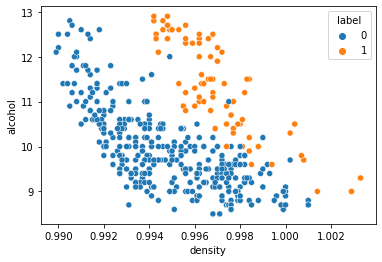

In [6]:
sns.scatterplot(x='density', y='alcohol', data=wine, hue='label')
#good wine (1) vs bad wine (0) berdasarkan fitur density dan alcohol

In [7]:
wine[['alcohol','density']].isna().sum() #alkohol memiliki 1 missing value

alcohol    1
density    0
dtype: int64

In [8]:
wine['alcohol']=wine['alcohol'].fillna(wine['alcohol'].mean()) #isi missing value

## Splitting data

In [9]:
x=wine[['alcohol','density']]
y=wine['label']

In [10]:
x_train, x_test, y_train, y_test= train_test_split(
    x,y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

## KNN without scaling

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier(n_neighbors=3) #simpan model di variabel knn. jumlah tetangga awal=3
knn.fit(x_train,y_train) #model belajar dari data train

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_predict=knn.predict(x_test) # hasil prediksi dengan data test
y_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
print('nilai akurasi model KNN tanpa scaling=',accuracy_score(y_test,y_predict))
# bisa memprediksi 9 dengan benar dari 10 kali

nilai akurasi model KNN tanpa scaling= 0.9038461538461539


## KNN dengan scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()
scaler.fit(x_train) # perhatikan bahwa fitting dilakukan menggunakan data train untuk mencegah data leaking
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [17]:
# x_train_scaled

In [18]:
knn=KNeighborsClassifier(n_neighbors=3) #define model
knn.fit(x_train_scaled,y_train)
y_pred_scale=knn.predict(x_test_scaled)

In [19]:
print('Nilai akurasi setelah scaling adalah', accuracy_score(y_test,y_pred_scale))

Nilai akurasi setelah scaling adalah 0.9807692307692307


Nilai akurasi meningkat dari 90.38% menjadi 98.08% setelah scaling. Penggunaan scaling pada metode KNN mampu meningkatkan preforma model.

## Memilih Nilai n_neighbor Terbaik

In [20]:
k=range(1,30,2) #1-29, nilai ganjil

testing_score=[]
training_score=[]
score=0

In [21]:
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    
    y_pred_train= knn.predict(x_train_scaled)
    training_score.append(accuracy_score(y_train,y_pred_train))
    
    y_pred_test= knn.predict(x_test_scaled)
    acc_score= accuracy_score(y_test,y_pred_test)
    testing_score.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_n=i

In [22]:
import warnings
warnings.filterwarnings('ignore')

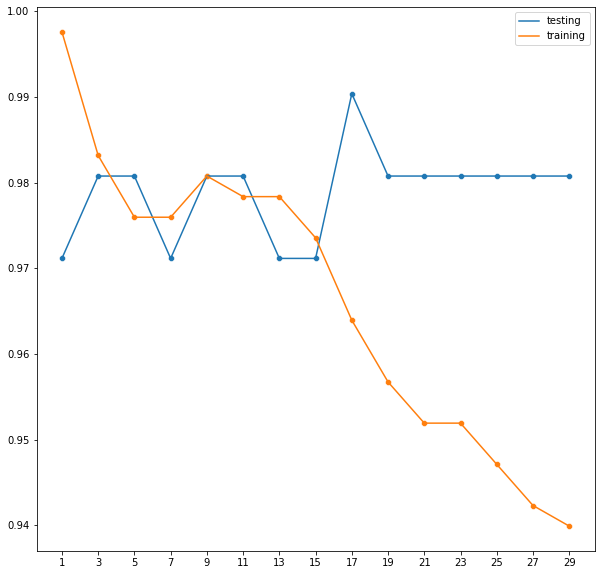

In [23]:
plt.figure(figsize=(10,10))
sns.lineplot(k,testing_score)
sns.scatterplot(k,testing_score)
sns.lineplot(k,training_score)
sns.scatterplot(k,training_score)
plt.legend(['testing', 'training'])
plt.xticks(list(k))
plt.show()

In [24]:
print(f'best n_neighbor: {best_n}\nbest score: {score}')

best n_neighbor: 17
best score: 0.9903846153846154


dengan pemilihan nilai n_neighbor yang tepat, nilai akurasi meningkat dari 98% menjadi 99%

# Latihan  

Gunakan data titanic dari seaborn
* target: `survived`
* fitur: pclass, sex, age, fare
* isi missing value jika ada
* split data menjadi train: test, 80:20
* cek akurasi model terhadap data test, buat 3 model:
     * tanpa scaling, n_neighbor=3
     * dengan scaling, n_neighbor=3
     * dengan scaling dan best n_neighbor


# Decision Tree Classifier

Analyze data white_wine.csv  
* Apply Decision Tree Classification Method (max_depth = 2)
    * target : quality (quality > 6 → Y = 1)
    * features : density, alcohol
* Validate the model using accuracy in 20% testing data
* Apply scaling and Validate the model using accuracy in 20% testing data
* Check the performance: is there any difference whether we applied scaling or not ?
* Check the tree: is there any difference whether we applied scaling or not ?

## Without Scalling

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
#data sudah difitting dan discaling sebelumnya
tree=DecisionTreeClassifier(max_depth=2) #max depth mengatur kedalaman pohon. 
tree.fit(x_train,y_train)
y_pred_tree=tree.predict(x_test)

In [30]:
print('nilai akurasi decision tree tanpa scaling:', accuracy_score(y_test,y_pred_tree))
# 95 prediksi benar dari 100 kali prediksi

nilai akurasi decision tree tanpa scaling: 0.9519230769230769


In [31]:
from sklearn.tree import plot_tree

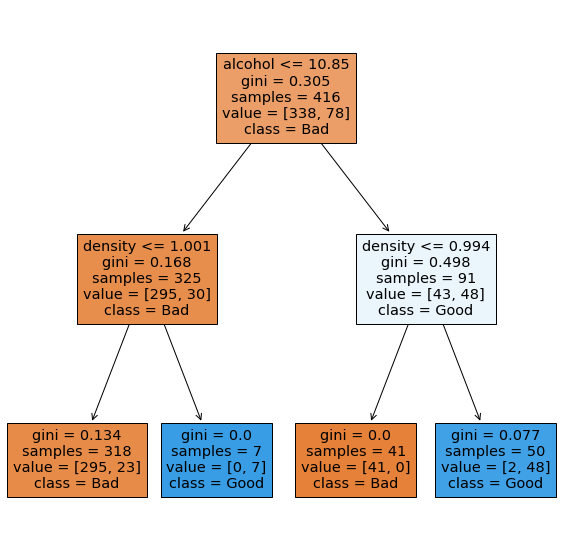

In [33]:
plt.figure(figsize=(10,10))
plot_tree(tree, feature_names= list(x), class_names=['Bad','Good'], filled=True)
plt.show()

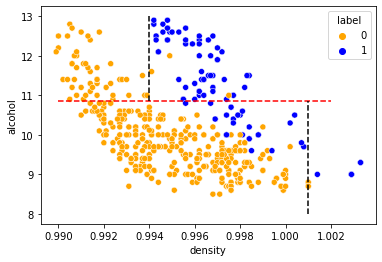

In [41]:
sns.scatterplot(x='density', y='alcohol', data=wine, hue='label', palette=['orange','blue'])
plt.plot([0.99,1.002],[10.85,10.85], 'r--')
plt.plot([1.001,1.001],[8,10.85],'k--')
plt.plot([0.994,0.994],[10.85,13],'k--')

## With Scaling

In [44]:
tree=DecisionTreeClassifier(max_depth=2) #max depth mengatur kedalaman pohon. 
tree.fit(x_train_scaled,y_train)
y_pred_tree_scaled=tree.predict(x_test_scaled)

In [45]:
print('Akurasi desicion tree dengan scaling', accuracy_score(y_test,y_pred_tree_scaled))
# akurasi dengan dan tanpa scaling sama saja

Akurasi desicion tree dengan scaling 0.9519230769230769


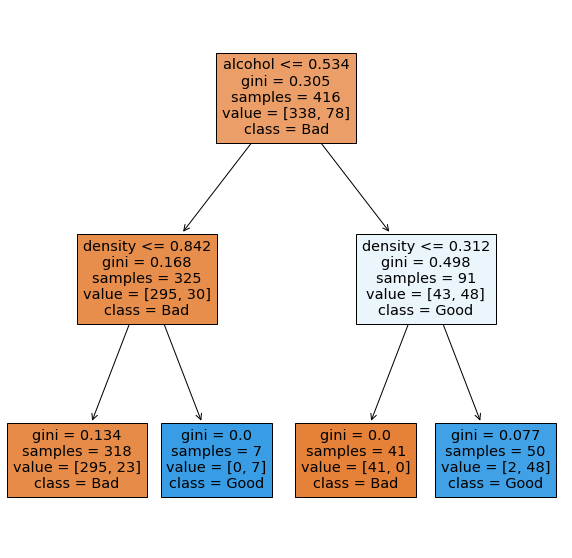

In [46]:
plt.figure(figsize=(10,10))
plot_tree(tree, feature_names= list(x), class_names=['Bad','Good'], filled=True)
plt.show()

Scaling tidak berpengaruh terhadap hasil prediksi pada desicion tree, tapi justru malah menyulitkan intepretasi pohon keputusan. Misal, di pohon pertama, kita bisa tau bahwa wine dengan konsetrasi alkohol di atas 10.85% dan density di atas 0.994 akan diprediksi sebagai `Good Wine`. Di pohon kedua, angka ini menjadi angka hasil scaling yang tidak ada artinya, sehingga lebih sulit dimengerti.

Dari hasil latihan ini, kita bisa mengambil kesimpulan bahwa masing2 metode/algoritma machine learning membutuhkan proses persiapan data yang berbeda. Scaling cocok dipakai untuk KNN, tapi tidak untuk decision tree.